In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [277]:
df = pd.read_csv("../Data/bluebook-for-bulldozers/Train.csv", low_memory=False)

In [278]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

In [280]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
401120     11/2/2011 0:00
401121     11/2/2011 0:00
401122     11/2/2011 0:00
401123    10/25/2011 0:00
401124    10/25/2011 0:00
Name: saledate, Length: 401125, dtype: object

In [281]:
features_with_null_values=[features for features in df.columns if df[features].isnull().sum()>1]

In [282]:
for feature in features_with_null_values:
    print(f"{feature} === {np.round(df[feature].isnull().sum()/len(df[feature])*100,2)}% are missing values ")
    




auctioneerID === 5.02% are missing values 
MachineHoursCurrentMeter === 64.41% are missing values 
UsageBand === 82.64% are missing values 
fiSecondaryDesc === 34.2% are missing values 
fiModelSeries === 85.81% are missing values 
fiModelDescriptor === 82.07% are missing values 
ProductSize === 52.55% are missing values 
Drive_System === 73.98% are missing values 
Enclosure === 0.08% are missing values 
Forks === 52.12% are missing values 
Pad_Type === 80.27% are missing values 
Ride_Control === 62.95% are missing values 
Stick === 80.27% are missing values 
Transmission === 54.32% are missing values 
Turbocharged === 80.27% are missing values 
Blade_Extension === 93.71% are missing values 
Blade_Width === 93.71% are missing values 
Enclosure_Type === 93.71% are missing values 
Engine_Horsepower === 93.71% are missing values 
Hydraulics === 20.08% are missing values 
Pushblock === 93.71% are missing values 
Ripper === 74.04% are missing values 
Scarifier === 93.71% are missing values 


In [283]:
df.isna().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050199
YearMade                    0.000000
MachineHoursCurrentMeter    0.644089
UsageBand                   0.826391
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342016
fiModelSeries               0.858129
fiModelDescriptor           0.820707
ProductSize                 0.525460
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.739829
Enclosure                   0.000810
Forks                       0.521154
Pad_Type                    0.802720
Ride_Control                0.629527
Stick                       0.802720
Transmission                0.543210
T

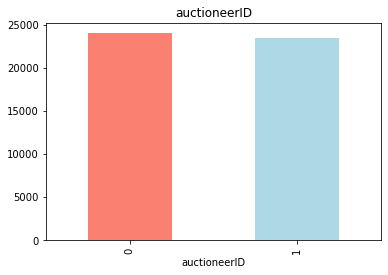

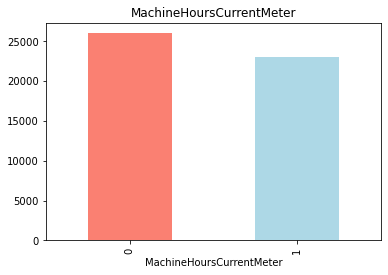

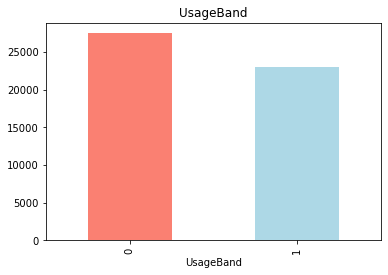

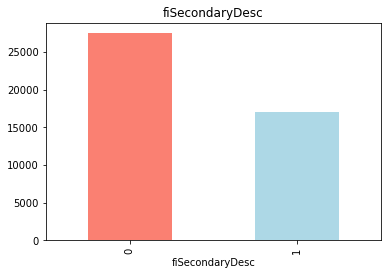

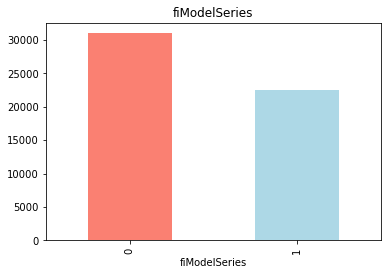

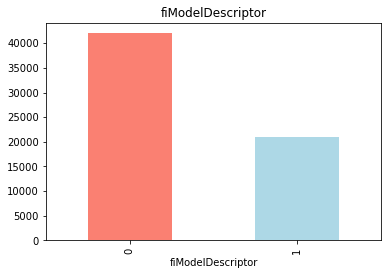

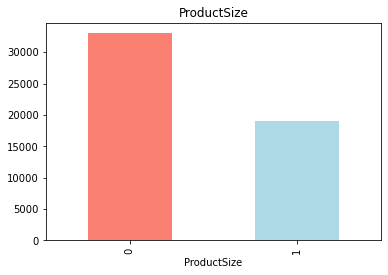

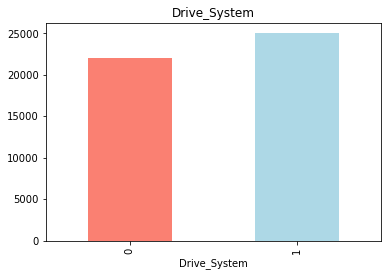

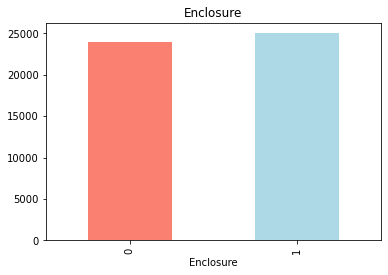

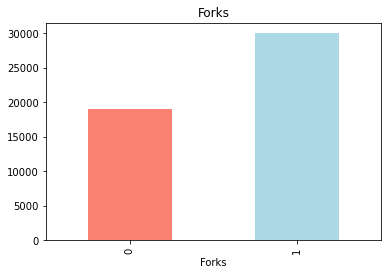

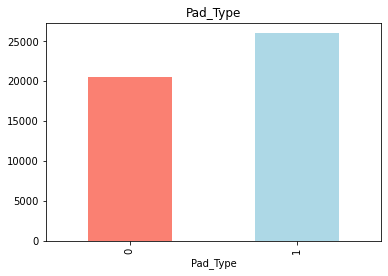

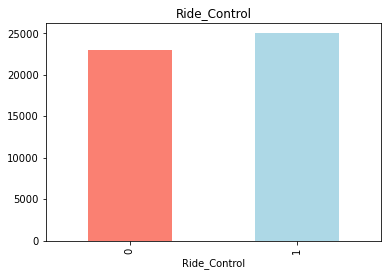

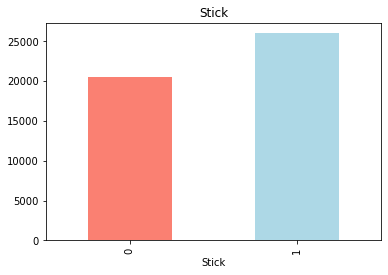

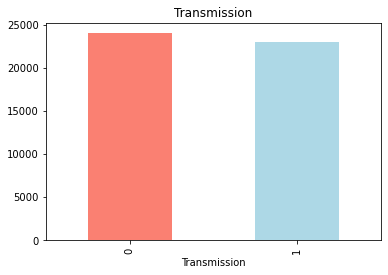

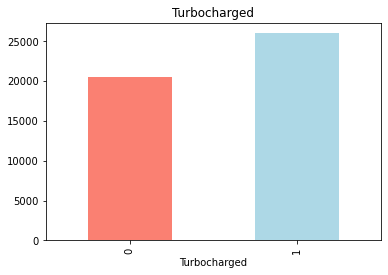

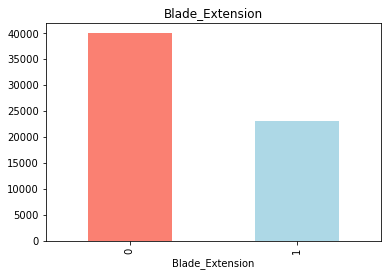

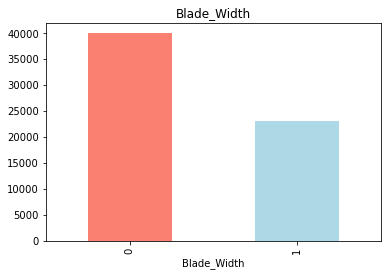

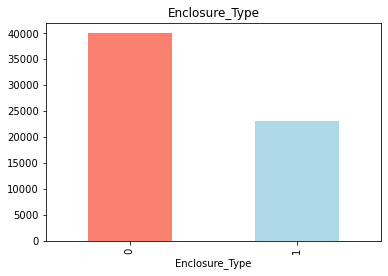

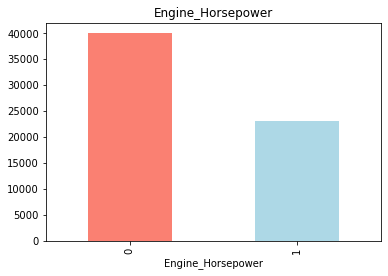

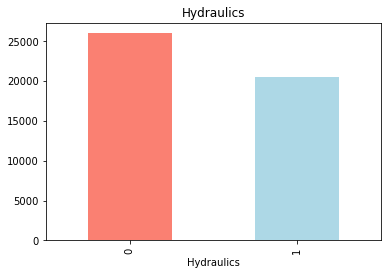

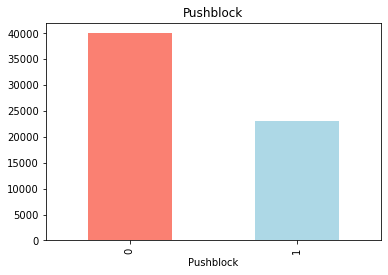

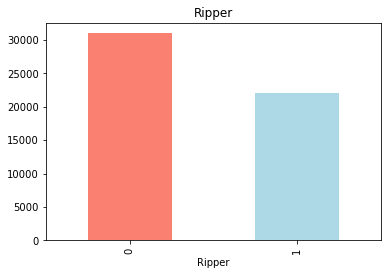

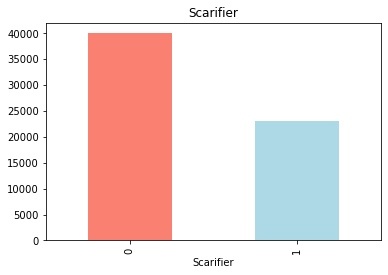

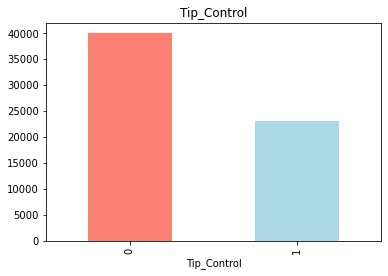

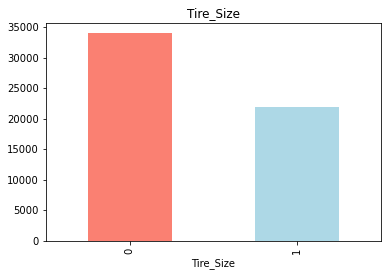

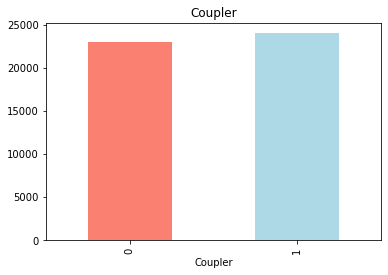

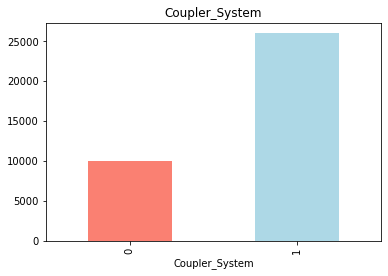

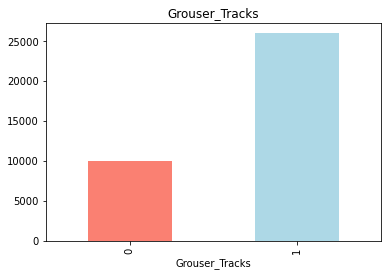

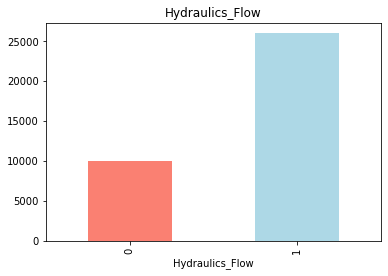

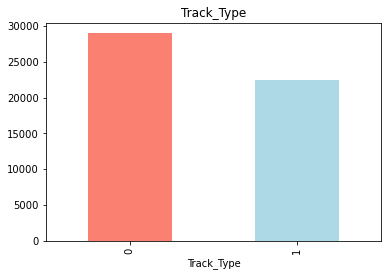

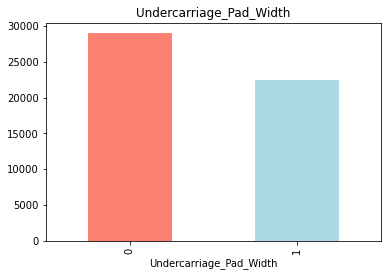

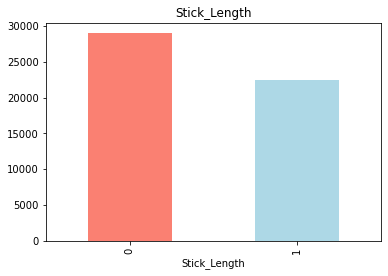

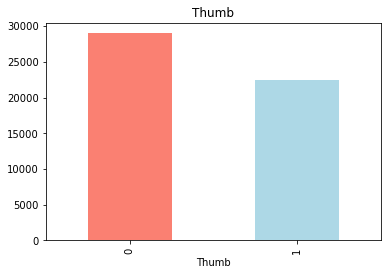

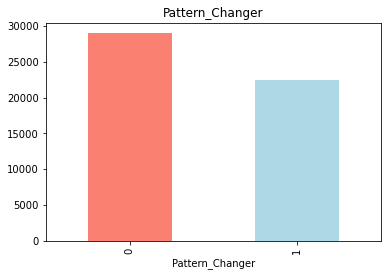

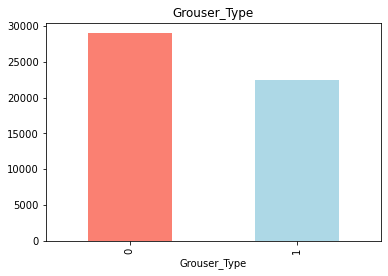

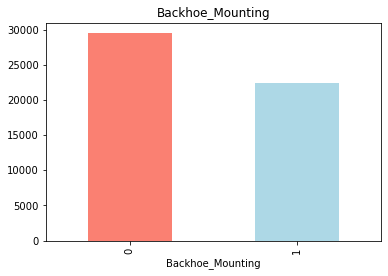

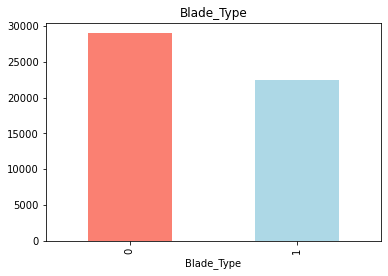

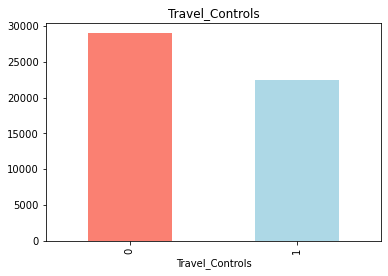

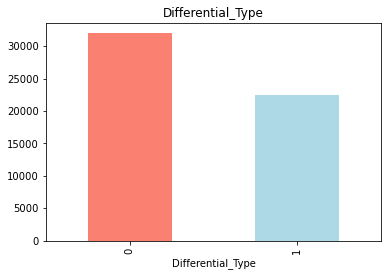

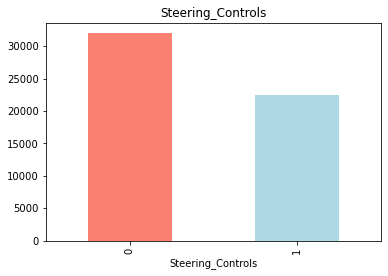

In [284]:
# Missing Values Split
for feature in features_with_null_values: 
    df_copy = df.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df_copy[feature] = np.where(df_copy[feature].isnull(), 1, 0)

    # let's calculate the mean SalePrice where the information is missing or present
    df_copy.groupby(feature)['SalePrice'].median().plot.bar(color=["salmon","lightblue"])
    plt.title(feature)
    plt.show()


<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

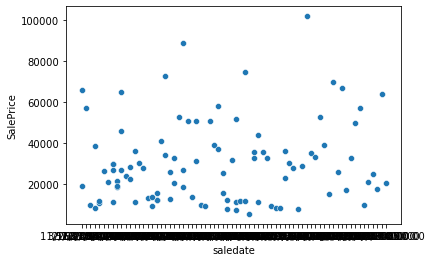

In [285]:
sns.scatterplot(x=df["saledate"][:100], y=df["SalePrice"][:100])

<AxesSubplot:>

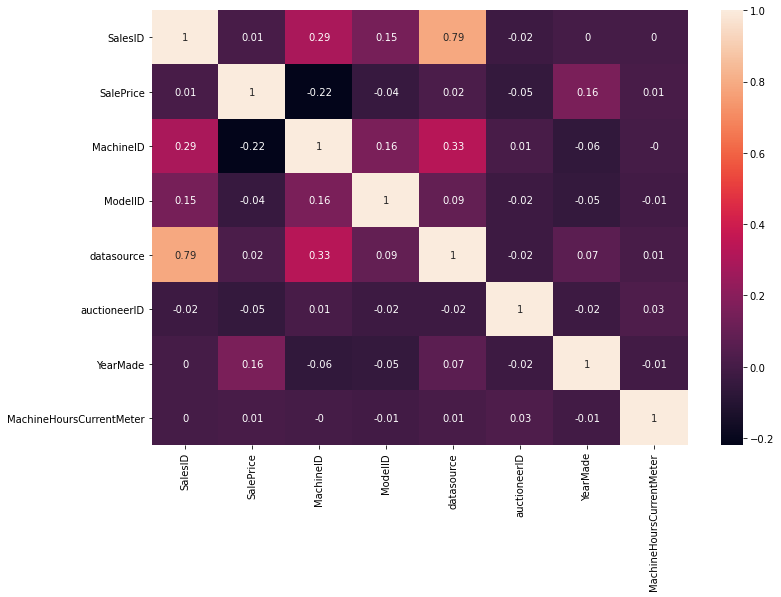

In [286]:
#Correlation Studies
plt.figure(figsize=(12, 8))
sns.heatmap(np.round(df.corr(),2), annot=True)

<AxesSubplot:ylabel='Frequency'>

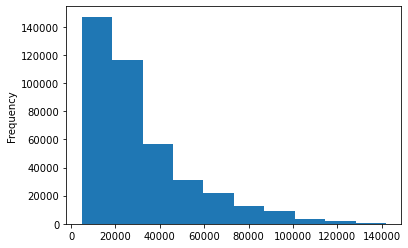

In [287]:
df.SalePrice.plot.hist()

# Parsing Dates

In [288]:

df = pd.read_csv("../Data/bluebook-for-bulldozers/Train.csv", low_memory=False, parse_dates=["saledate"])

In [289]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

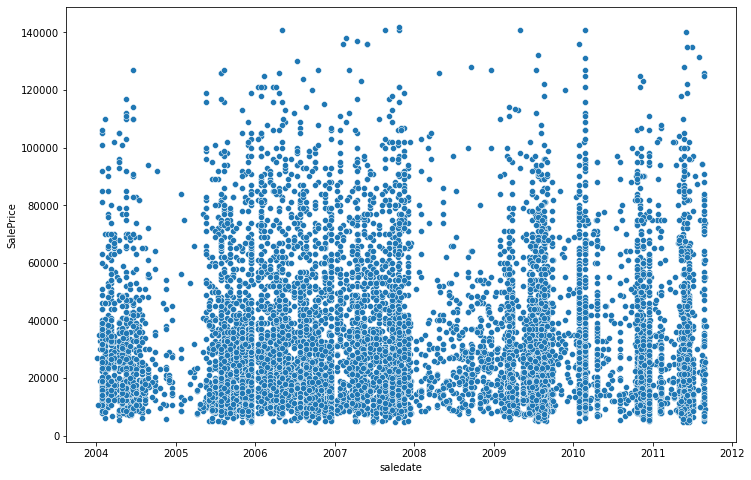

In [290]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df["saledate"][:10000], y=df["SalePrice"][:10000])

In [291]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [292]:
# sort by date

df.sort_values(by=["saledate"], ascending=True, inplace=True)

In [293]:
df.saledate.head(20)

205615   1989-01-17
92803    1989-01-31
98346    1989-01-31
169297   1989-01-31
274835   1989-01-31
75378    1989-01-31
81383    1989-01-31
134080   1989-01-31
55455    1989-01-31
55454    1989-01-31
114830   1989-01-31
54653    1989-01-31
238373   1989-01-31
98567    1989-01-31
113454   1989-01-31
92780    1989-01-31
113390   1989-01-31
127000   1989-01-31
92833    1989-01-31
32138    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [294]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [295]:
df_temp = df.copy()

In [296]:
df_temp.saledate.head()

205615   1989-01-17
92803    1989-01-31
98346    1989-01-31
169297   1989-01-31
274835   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [297]:
df_temp["SaleYear"] = df_temp.saledate.dt.year
df_temp["SaleMonth"] = df_temp.saledate.dt.month
df_temp["SaleDay"] = df_temp.saledate.dt.day
df_temp["SaleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["SaleDayOfYear"] = df_temp.saledate.dt.dayofyear


In [298]:
df_temp[["SaleYear","SaleMonth","SaleDay","SaleDayOfWeek","SaleDayOfYear"]]

,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear
205615,1989,1,17,1,17
92803,1989,1,31,1,31
98346,1989,1,31,1,31
169297,1989,1,31,1,31
274835,1989,1,31,1,31
...,...,...,...,...,...
393123,2011,12,30,4,364
397987,2011,12,30,4,364
392664,2011,12,30,4,364
400458,2011,12,30,4,364


In [299]:
df_temp.drop("saledate", axis=1, inplace=True)

In [300]:
df_temp.SaleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

## Converting Stings to Category

In [301]:
pd.api.types.is_string_dtype(df_temp.fiProductClassDesc)

True

In [302]:
# for col in df_temp.columns:
#     if pd.api.types.is_string_dtype(df[col]):
#         print(col)


for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [303]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor       

In [304]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [305]:
df_temp.state.cat.codes

205615    43
92803      8
98346      8
169297     8
274835     8
          ..
393123    31
397987    31
392664    31
400458    31
400217    31
Length: 401125, dtype: int8

## Filling Missing Values

In [306]:
#Numeric Data First

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content) and df_temp[label].isna().sum()>=1:
        print(label)
    

auctioneerID
MachineHoursCurrentMeter


In [307]:
#Filling missing values

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content) and df_temp[label].isna().sum()>=1:
        #Adding a binary colum which tells if filled data was missing
        df_temp[label+"_is_missing"] = pd.isnull(content)
        #Filling in numeric values with median
        df_temp[label]=content.fillna(content.median())
    

In [308]:
df_temp[["auctioneerID","auctioneerID_is_missing"]]

,auctioneerID,auctioneerID_is_missing
205615,18.0,False
92803,99.0,False
98346,99.0,False
169297,99.0,False
274835,99.0,False
...,...,...
393123,2.0,False
397987,2.0,False
392664,2.0,False
400458,2.0,False


In [309]:
df_temp.auctioneerID_is_missing.value_counts()

False    380989
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [310]:
# for label, content in df_temp.items():
#     if not pd.api.types.is_numeric_dtype(content):
#         print(label)

In [311]:
#turing catergorical values to codes (categorical numbers)
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+"_is_missing"] = pd.isnull(content)
        #add + 1 to categorical codes  to change null codes from -1 to 0
        df_temp[label] = pd.Categorical(df_temp[label]).codes + 1

In [312]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(2), int16(4), int64(11), int8(40)
memory usage: 78.8 MB


In [313]:
df_temp.head().transpose()

,205615,92803,98346,169297,274835
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,True,True,False,False


In [314]:
df_temp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SalesID,401125.0,1.919713e+06,909021.492667,1139246.0,1418371.0,1639422.0,2242707.0,6333342.0
SalePrice,401125.0,3.109971e+04,23036.898502,4750.0,14500.0,24000.0,40000.0,142000.0
MachineID,401125.0,1.217903e+06,440991.954249,0.0,1088697.0,1279490.0,1468067.0,2486330.0
ModelID,401125.0,6.889703e+03,6221.777842,28.0,3259.0,4604.0,8724.0,37198.0
datasource,401125.0,1.346658e+02,8.962237,121.0,132.0,132.0,136.0,172.0
auctioneerID,401125.0,6.327332e+00,16.575066,0.0,1.0,2.0,4.0,99.0
YearMade,401125.0,1.899157e+03,291.797469,1000.0,1985.0,1995.0,2000.0,2013.0
MachineHoursCurrentMeter,401125.0,1.230726e+03,16542.903170,0.0,0.0,0.0,0.0,2483300.0
UsageBand,401125.0,4.019420e-01,0.930860,0.0,0.0,0.0,0.0,3.0
fiModelDesc,401125.0,1.673709e+03,1263.331163,1.0,631.0,1395.0,2292.0,4999.0


In [315]:
df_temp.UsageBand

205615    0
92803     0
98346     0
169297    0
274835    0
         ..
393123    0
397987    0
392664    0
400458    0
400217    0
Name: UsageBand, Length: 401125, dtype: int8

In [316]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [317]:
from sklearn.ensemble import RandomForestRegressor

In [318]:
X=df_temp.drop("SalePrice", axis=1)
y= df_temp.SalePrice

In [319]:
len(X)

401125

In [320]:
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X,y)

CPU times: user 14min 31s, sys: 12.1 s, total: 14min 43s
Wall time: 2min 24s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [321]:
model.score(X,y)

0.9875209731205072

In [322]:
#Splitting data into training and validation based on Kaggle data split for this assignment 

In [323]:
df_temp.SaleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

In [324]:
df_val = df_temp[df_temp.SaleYear==2011]
df_train = df_temp[df_temp.SaleYear!=2011]

len(df_val),len(df_train)

(35197, 365928)

In [325]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

In [326]:
X_train.shape, y_train.shape, X_valid.shape,y_valid.shape

((365928, 102), (365928,), (35197, 102), (35197,))

In [336]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

In [342]:
def rmls(y_test,y_preds):
    score = np.sqrt(mean_squared_log_error(y_test,y_preds))
    return score

def show_scores(model):
    train_predictions = model.predict(X_train)
    validation_predictions = model.predict(X_valid)
    scores = {"MAE Training Score": mean_absolute_error(y_train,train_predictions),
              "MAE Validation Score": mean_absolute_error(y_valid,validation_predictions),
              "Root Mean Log Error - Training": rmls(y_train, train_predictions),
              "Root Mean Log Error - Validation": rmls(y_valid,validation_predictions),
              "R2 Score Training": r2_score(y_train,train_predictions),
              "R2 Score -Validation": r2_score(y_valid,validation_predictions)
        
    }
    
    return scores
    

In [344]:
%%time
show_scores(model)

CPU times: user 22.1 s, sys: 3.91 s, total: 26 s
Wall time: 11.9 s


{'MAE Training Score': 1567.1717027120087,
 'MAE Validation Score': 1700.1029982668979,
 'Root Mean Log Error - Training': 0.0843287564579558,
 'Root Mean Log Error - Validation': 0.08322201703049692,
 'R2 Score Training': 0.9874978773339309,
 'R2 Score -Validation': 0.9875506844743694}

In [346]:
from sklearn.model_selection import RandomizedSearchCV

In [370]:

params = {
    "n_estimators": np.arange(10,100,10),
    "max_depth":[None,3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features": [0.5,1,"sqrt","auto"],
#     "max_samples": [1000]
    
}

rcv_model = RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1,random_state = 42), 
                               cv=5, 
                               n_iter=5,
                               param_distributions= params,
                               verbose=True
                              )

In [371]:
%%time
rcv_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.2min finished


CPU times: user 4min 13s, sys: 11.4 s, total: 4min 24s
Wall time: 4min 45s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [373]:
rcv_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_features': 0.5,
 'max_depth': 10}

In [374]:
show_scores(rcv_model)

{'MAE Training Score': 6529.1734602667575,
 'MAE Validation Score': 7300.374673972728,
 'Root Mean Log Error - Training': 0.2939294826833471,
 'Root Mean Log Error - Validation': 0.303092555698985,
 'R2 Score Training': 0.8152197870028529,
 'R2 Score -Validation': 0.8070411077618485}

In [392]:

# df = pd.read_csv("../Data/bluebook-for-bulldozers/Train.csv", low_memory=False, parse_dates=["saledate"])
df_test = pd.read_csv("../Data/bluebook-for-bulldozers/Test.csv", parse_dates=["saledate"],low_memory=False)

In [380]:
df_test.head() 


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [393]:
def data_preprocessing(df):
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.dayofweek
    df["SaleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)
    
#     for label, content in df.items():
#         if pd.api.types.is_string_dtype(content):
#             df[label] = content.astype('category').cat.as_ordered()
        
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content) and df[label].isna().sum()>=1:
            #Adding a binary colum which tells if filled data was missing
            df[label+"_is_missing"] = pd.isnull(content)
            #Filling in numeric values with median
            df[label]=content.fillna(content.median())
            
         #turing catergorical values to codes (categorical numbers)
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            #add + 1 to categorical codes  to change null codes from -1 to 0
            df[label] = pd.Categorical(df[label]).codes + 1

    
    return df

In [394]:
df_test = data_preprocessing(df_test)
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [395]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

In [396]:
#Find out how columsn differ using sets
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [397]:
df_test['auctioneerID_is_missing'] = False
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,True,True,True,True,True,False
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,True,True,True,True,True,False
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False


In [398]:
test_predictions = rcv_model.predict(df_test)

In [399]:
test_predictions

array([24994.18899882, 20894.48217956, 53730.8222725 , ...,
       14111.92100239, 17875.38425912, 21501.19199112])

In [404]:
df_predictions = pd.DataFrame()
df_predictions["SalesID"] = df_test["SalesID"]
df_predictions["Predicted Price"] = test_predictions

df_predictions

,SalesID,Predicted Price
0,1227829,24994.188999
1,1227844,20894.482180
2,1227847,53730.822272
3,1227848,61640.832262
4,1227863,41108.272316
...,...,...
12452,6643171,39487.884697
12453,6643173,15226.109555
12454,6643184,14111.921002
12455,6643186,17875.384259


In [406]:
#Feature Importance

model.feature_importances_

array([4.98110316e-02, 1.65111104e-02, 3.18158713e-02, 4.23837756e-04,
       4.47045831e-03, 2.62088895e-01, 3.13621651e-03, 1.12823959e-03,
       1.98571569e-02, 8.10798998e-02, 5.12983209e-02, 4.42979074e-03,
       3.40501704e-03, 2.27518996e-01, 3.93126754e-02, 8.89121600e-03,
       2.35783824e-04, 3.06387263e-04, 1.71751000e-03, 8.88502762e-03,
       4.27061267e-04, 3.75692154e-05, 5.65562589e-04, 1.78749354e-04,
       1.56838642e-03, 2.67877962e-05, 1.92901082e-04, 4.81205710e-03,
       2.94092428e-04, 3.58492014e-04, 2.84252842e-03, 2.70865642e-03,
       2.32029494e-03, 2.78285451e-03, 5.31662355e-04, 1.69742634e-03,
       9.99406365e-04, 1.48086730e-02, 9.06923488e-06, 4.21043432e-06,
       1.94187097e-04, 1.11755244e-03, 1.28918120e-03, 7.76762750e-04,
       2.55193852e-04, 4.80099382e-04, 2.44343910e-04, 1.72826502e-03,
       9.60484406e-04, 1.68578115e-04, 2.46936573e-04, 7.59929985e-02,
       3.35972193e-03, 9.17972541e-03, 4.59024599e-03, 1.47888114e-02,
      

In [414]:
def plot_features(columns,importance,n=20):
    df = (pd.DataFrame({'features':columns, 'feature_importance':importance})
          .sort_values("feature_importance",ascending=False).reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importance"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

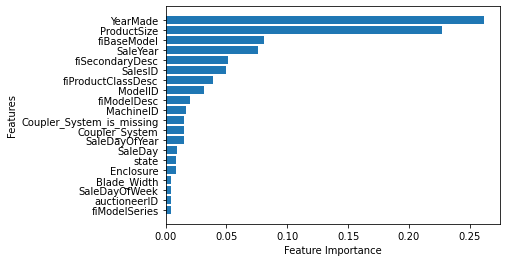

In [415]:
plot_features(columns=X_train.columns, importance=model.feature_importances_)